# 한글 데이터셋 모델 코드

In [104]:
# ## 2-1. Keras 모델 생성 및 훈련
# ## 2-1. Keras model initialization and training

# import keras
# import keras.utils as utils

# from keras import backend as K
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Convolution2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import EarlyStopping
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# batch_size = 128
# epochs = 300
# num_classes = 980

# y_train = utils.to_categorical(y_train, num_classes)
# y_val = utils.to_categorical(y_val, num_classes)

# cb_early_stopping = EarlyStopping(monitor='val_loss', patience=50)

# train_generator = ImageDataGenerator(rescale=1./255, 
#                                      rotation_range=15, 
#                                      width_shift_range=0.15, 
#                                      height_shift_range=0.15, 
#                                      shear_range=0.2, 
#                                      zoom_range=[0.8, 1.2])

# val_generator = ImageDataGenerator(rescale=1./255)

# train_data_flow = train_generator.flow(X_train, y_train, 
#                                        batch_size=batch_size)
# val_data_flow = val_generator.flow(X_val, y_val,
#                                    batch_size=batch_size)

# img_rows, img_cols = 32, 32
# input_shape = (img_rows, img_cols, 3)

# model = Sequential()
# model.add(Convolution2D(32, (3, 3), padding='same',
#                  input_shape=X_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Convolution2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Convolution2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Dropout(0.50))

# model.add(Convolution2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# RMSprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
                     
# model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop,
#               metrics=['accuracy'])

# hist = model.fit_generator(train_data_flow,
#                            epochs=epochs,
#                            verbose=1,
#                            steps_per_epoch = 230,
#                            validation_data=val_data_flow,
#                            validation_steps = 70,
#                            callbacks=[cb_early_stopping])

# model.save('hand_written_korean_classification.hdf5')

In [1]:
import cv2
import numpy as np
from skimage import io
from skimage.transform import resize
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import load_model

# 한글 데이터셋 모델 불러오기

In [29]:
model = load_model('hand_written_korean_classification.hdf5')

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [79]:
newimage = cv2.imread('./photo/323232.jpg')

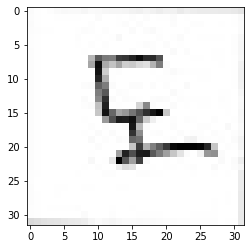

In [82]:
plt.imshow(newimage)
plt.show()

In [83]:
test_x = []
test_x.append(newimage)

testx = np.array(test_x)
testx = testx / 255

print(model.predict_classes(testx))

[217]


In [84]:
import pandas as pd

In [85]:
B = pd.read_table('./label.txt',header=None)

In [88]:
print(B.iloc[217])

0    도
Name: 217, dtype: object
